## Linear Regression
pada bagian ini kit akan belajar mengenai metode linear regression untuk melakukan learning dan predicting pada Salary_Data. Linear Regression adalah salah satu metode pada supervised learning yang paling sederhana. 
![alt text](https://miro.medium.com/max/6088/1*7tcfpzsXbrxROhVCB8BkBA.png)

jika kita pernah belajar matematika mengenai persamaan garis lurus. rumus yang terdapat pada persamaan tersebut adalah **y=mx+c**.  
dimana:  
Y = Output  
m = Gradient  
x = nilai titik diketahui  
c = koefisien

pada Linear Regression digunakan Persamaan yang mirip, tetap dengan notasi penulisan yang berbeda. pada Linear Regression biasanya digunakan persamaan **y=wx+b** .  
dimana:  
y = Output/Dependent variable  
w = beban  
x = independent variable  
b = bias  
Selain itu, terkadang pada Linear Regression ditulis juga persamaan seperti pada gambar diatas. 

Pada metode linear Regression, mesin akan mencoba seluruh kemungkinan garis linear yang ada dan akan mencari error yang terkecil dan dijadikan sebagai sebuah model. Error pada linear Regression dicari menggunakan persamaan pada gambar dibawah ini 
![alt text](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548702778023.png)

sebelum melakukan pengolahan data, pertama-tama dataset pada file Salary_Data.csv diupload terlebih dahulu pada google colab

In [12]:
from google.colab import files
upload = files.upload()

Saving Salary_Data.csv to Salary_Data (1).csv


Selanjutnya dlakukan import library yang akan digunakan, yaitu:  
Pandas library yang digunakan untuk melakukan manipulasi dan analisa data  
matplotlib  library yang digunakan untuk membuat grafik atau plot pada data  
numpy library yang digunakan untuk melakukan operasi matematika


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Langkah Selanjutnya adalah melakukan import dataset dan menyimpannya pada sebuah variable.

In [14]:
df = pd.read_csv("Salary_Data.csv")
df.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Selanjutnya menentukan dependent variable dan independent variable dari data diatas. pada data diatas kita akan menggunakan Salary sebagai dependent variable dan YearsExperience sebagai independent variable. jika dibuat menjadi persamaan maka kita akan membuat persamaan Salary = w*YearsExperience + b. YearsExperience selanjutnya akan kita simpan pada variable X dan Salary pada Variable Y.

In [0]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

Selanjutnya lakukan pembagian menjadi data training dan data test. dimana data training adalah data yang akan digunakan oleh mesin untuk di learning menjadi model. Sementara data test adalah data yang akan digunakan oleh mesin untuk validasi model oleh mesin. pada proses pembagian data menjadi data training dan data test biasanya digunakan ratio pembagian data test= 1/4*data total. tapi ratio ini bukan wajib, tergantung case dan jumlah data.

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state=0)

Setelah data training dan data test selesai dikelompokkan, selanjutnya dilakukan proses learning dengan metode Linear Regression.

In [17]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Setelah learning dilakukan, selanjutnya dilkan prediksi pada test.

In [0]:
prediksi = regressor.predict(x_test)

Sesudah dilakukan prediksi terhadap output data test, selanjutnya dilakukan penghitungan untuk Error pada model kita dengan metode RMSE(Root Mean Square Error). Pada perhitungan error pada RMSE, apabila nilai RMSE < 10% * Y . maka Model dikatakan cukup baik
![alt text](https://i.stack.imgur.com/eG03B.png)

In [29]:
from sklearn import  metrics
print("RMSE pada model {}".format(np.sqrt(metrics.mean_squared_error(y_test,prediksi))))

RMSE pada model 4733.70258289858


Setelah Diketahui RMSE pada Model diatas, selanjutnya dilakukan plot model dan data untuk mengetahui bagaimana karakteristik model yang kita buat dalam bentuk grafik.

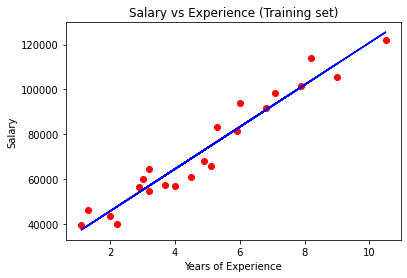

In [32]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


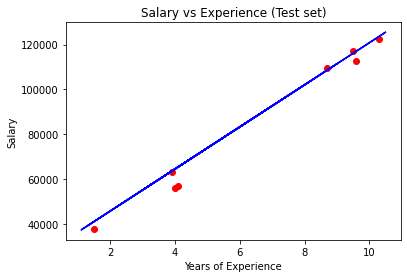

In [34]:
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()